<a href="https://www.kaggle.com/code/kundanm10/clothing-sales?scriptVersionId=233220947" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
data=pd.read_csv("/kaggle/input/dynamic-apparel-sales-dataset-with-anomalies/Multiclass Clothing Sales Dataset.csv", encoding="latin-1")

In [4]:
data.head(3)

,Product_Category,Brand,Product_Name,Gender,Size,Color,Season,Payment_Method,Customer_Type,Selling_Price,Cost_Price,Discount_Percentage,Quantity_Sold,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate,Sales_Category
0,Traditional Wear,Forever 21,Tops,Women,S,White,Winter,Card,New,1817.433878,816.027585,26.260791,6,42241.692855,294.0,58.0,2.560957,3.106155,29.293331,High Sales
1,Athleisure,Ralph Lauren,Casual Shirt,Men,XXL,Yellow,All-Season,Card,Returning,1672.038198,793.236861,26.882613,8,69318.541482,376.0,40.0,1.590993,3.428439,19.473670,Low Sales
2,Outerwear,Nike,Blazer,Men,S,Green,All-Season,UPI,Returning,1381.568069,890.469629,30.274720,5,56851.121070,48.0,41.0,3.066213,3.765591,22.083407,Medium Sales


In [5]:
data.describe()

,Selling_Price,Cost_Price,Discount_Percentage,Quantity_Sold,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate
count,95000.000000,100000.000000,95000.000000,100000.000000,100000.000000,95000.000000,95000.000000,100000.000000,95000.000000,100000.000000
mean,1554.029505,1041.472376,24.994389,5.348760,50051.437498,250.329842,41.066821,2.081108,3.995121,14.956974
std,974.709187,734.619046,14.431100,7.215449,20076.412144,144.472592,13.567101,1.896919,0.586217,8.651961
min,-613.615890,-726.934992,0.000127,1.000000,-37155.408729,0.000000,18.000000,-2.096379,1.002394,0.000492
25%,1162.144173,732.336452,12.447380,3.000000,36596.251916,126.000000,29.000000,1.327364,3.497587,7.435705
50%,1501.409850,1005.567011,25.007454,5.000000,50115.894604,251.000000,41.000000,2.001746,3.995872,14.960901
75%,1842.752501,1276.944645,37.450829,7.000000,63504.829774,376.000000,53.000000,2.685177,4.497780,22.440826
max,19989.216427,14992.757159,49.999563,199.000000,141640.191523,499.000000,64.000000,49.000000,4.999984,29.999077


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Product_Category     100000 non-null  object 
 1   Brand                100000 non-null  object 
 2   Product_Name         100000 non-null  object 
 3   Gender               100000 non-null  object 
 4   Size                 100000 non-null  object 
 5   Color                100000 non-null  object 
 6   Season               100000 non-null  object 
 7   Payment_Method       100000 non-null  object 
 8   Customer_Type        100000 non-null  object 
 9   Selling_Price        95000 non-null   float64
 10  Cost_Price           100000 non-null  float64
 11  Discount_Percentage  95000 non-null   float64
 12  Quantity_Sold        100000 non-null  int64  
 13  Total_Sales          100000 non-null  float64
 14  Stock_Availability   95000 non-null   float64
 15  Customer_Age      

In [7]:
data.isnull().sum()

Product_Category          0
Brand                     0
Product_Name              0
Gender                    0
Size                      0
Color                     0
Season                    0
Payment_Method            0
Customer_Type             0
Selling_Price          5000
Cost_Price                0
Discount_Percentage    5000
Quantity_Sold             0
Total_Sales               0
Stock_Availability     5000
Customer_Age           5000
Purchase_Frequency        0
Store_Rating           5000
Return_Rate               0
Sales_Category            0
dtype: int64

In [8]:
data["Product_Category"].unique()

array(['Traditional Wear', 'Athleisure', 'Outerwear', 'Bottoms', 'Tops'],
      dtype=object)

In [9]:
data["Brand"].unique()

array(['Forever 21', 'Ralph Lauren', 'Nike', 'Zara', 'Wrangler',
       'Balenciaga', 'Uniqlo', 'Reebok', 'Gucci', 'Louis Vuitton',
       'Tommy Hilfiger', 'Under Armour', 'Calvin Klein', 'Puma', 'Diesel',
       'Versace', 'Leviâ\x80\x99s', 'Adidas', 'H&M', 'GAP'], dtype=object)

In [10]:
data["Size"].unique()

array(['S', 'XXL', 'M', 'XL', 'L'], dtype=object)

# Total Slaes By Season

In [11]:
df_slaes=data.groupby("Season") ["Total_Sales"].sum().reset_index()

In [12]:
df_slaes

,Season,Total_Sales
0,All-Season,1.659929e+09
1,Summer,1.667789e+09
2,Winter,1.677426e+09


In [13]:
custom_colors = ['#FF6361', '#58508D', '#FFA600', '#003F5C']
fig=px.pie(df_slaes,
           values="Total_Sales",
           names="Season",
           title="Total sales By Season",
          hole=0.5,
          width=500,
          height=500,
           color_discrete_sequence=custom_colors)

fig.update_traces(textinfo="label+percent")  
fig.show()

📊 **Insight from Season-wise Sales Distribution**

🔍 Observation:
The pie chart shows the distribution of total sales across different seasons:

🧥 Winter: 33.5%

☀️ Summer: 33.2%

🌦️ All-Season: 33.2% 

**Sales across all seasons are remarkably balanced, with each contributing roughly one-third of the total revenue. However, winter edges out slightly with the highest share at 33.5%, indicating a marginal seasonal tilt in consumer buying behavior during colder months.**

**Note:No single season dominates, so it's essential to maintain equitable stock levels across all categories to avoid overstocking or understocking.**

## Sales Performance Analysis
### Top Selling Categories & Brands:

 Identify which Product_Category and Brand generate the most revenue.

 Best-Selling vs. Least-Selling Products:

Identify top 10 and bottom 10 products in terms of Total_Sales.

## Total Sales By Categories

In [14]:
selling_by_categories=data.groupby("Product_Category") ["Total_Sales"].sum().reset_index()
selling_by_categories

,Product_Category,Total_Sales
0,Athleisure,1.010051e+09
1,Bottoms,1.005515e+09
2,Outerwear,9.893728e+08
3,Tops,1.000563e+09
4,Traditional Wear,9.996424e+08


In [15]:
fig=px.bar(selling_by_categories,
           y="Product_Category",
           x="Total_Sales",
           orientation="h",
           color="Product_Category",
          text_auto= True)
fig.update_layout(
    width=900,
    height=500 ,
    title={
        'text': "Total Sales By Category",
        'x':0.5,  # center align
        'xanchor': 'center',
        'font': dict(size=24, color='darkblue')
    }
 )
fig.show()

**The sales distribution across product categories shows a tight competition, with Athleisure slightly leading the race. The difference between the top and bottom performing categories is less than 2%, signaling a well-balanced product strategy. However, even such small differences can indicate where to place the next bet.**

# 💡 Business Recommendations:
**Double Down on Athleisure:
Consider launching new collections, collaborations, or targeted campaigns around this trend.**

#  Brand That generate the most revenue

In [16]:
brand_revenue=data.groupby("Brand") ["Total_Sales"].sum().reset_index()
brand_revenue

,Brand,Total_Sales
0,Adidas,2.497410e+08
1,Balenciaga,2.443927e+08
2,Calvin Klein,2.518003e+08
3,Diesel,2.477745e+08
4,Forever 21,2.526198e+08
5,GAP,2.493179e+08
6,Gucci,2.471669e+08
7,H&M,2.529726e+08
8,Leviâs,2.531676e+08
9,Louis Vuitton,2.512750e+08


# Top 5 Brand

In [17]:
top_5_brand=brand_revenue.nlargest(5, "Total_Sales")
top_5_brand

,Brand,Total_Sales
18,Wrangler,2.581762e+08
12,Ralph Lauren,2.569333e+08
8,Leviâs,2.531676e+08
7,H&M,2.529726e+08
4,Forever 21,2.526198e+08


In [18]:
fig=px.bar(top_5_brand,
           y="Brand",
           x="Total_Sales",
            orientation="h",
           color="Brand",
            text_auto=True,)
fig.update_layout(
   # width=900,
     height=500 ,
    title={
        'text': "Top 5 Brand",
        'x':0.4,  # center align
        'xanchor': 'center',
        'font': dict(size=24, color='darkblue')
    }
 )



fig.show()

# Total Sales By  Product Name

In [19]:
total_sales_by_name=data.groupby("Product_Name") ["Total_Sales"].sum().reset_index()
total_sales_by_name

,Product_Name,Total_Sales
0,Blazer,2.494907e+08
1,Casual Shirt,2.521661e+08
2,Dress,2.530410e+08
3,Formal Shirt,2.546331e+08
4,Hoodie,2.447674e+08
5,Jacket,2.532556e+08
6,Jeans,2.476365e+08
7,Jumpsuit,2.466810e+08
8,Kurta,2.490401e+08
9,Leggings,2.543679e+08


In [20]:
# Create Bar Chart
fig = px.bar(total_sales_by_name, 
             y="Product_Name", 
             x="Total_Sales", 
             orientation="h",
             title="Total Sales by Product Name", 
             text_auto=True,  # Show sales values on bars
             color="Product_Name")  # Different colors for better visualization
fig.update_layout(
    xaxis=dict(
        tickformat=".0f",  # No decimal places
        tickmode="array",   # Define custom tick positions
        tickvals=[50000000, 100000000, 150000000, 200000000, 240000000],
        ticktext=["50M", "100M", "150M", "200M", "240M"]  # Display custom labels
                                                               )
)
fig.update_layout(
    width=1000,  
    height=600,
    title={
        'text': "Total Sales by Product Name",
        'x':0.5,  # center align
        'xanchor': 'center',
        'font': dict(size=24, color='darkblue')
    }
 
      )

fig.show()

 ## Best-Selling vs. Least-Selling Products:

Identify top 5 and bottom 5 products in terms of Total_Sales.

In [21]:
top_5 = total_sales_by_name.nlargest(5, "Total_Sales")  # Get top 5 rows with highest sales

fig = px.bar(top_5, y="Product_Name", x="Total_Sales",orientation="h", title="Top 5 Products by Sales",text_auto=True,  # Show sales values on bars
             color="Product_Name")

fig.show()

In [22]:
bottom_5 = total_sales_by_name.nsmallest(5, "Total_Sales")  # Get bottom 5 rows with highest sales
bottom_5

,Product_Name,Total_Sales
14,Skirt,2.428155e+08
15,Sweatshirt,2.445574e+08
18,Track Pants,2.447536e+08
4,Hoodie,2.447674e+08
7,Jumpsuit,2.466810e+08


In [23]:
fig = px.bar(bottom_5, y="Product_Name", x="Total_Sales",orientation="h", title="Bottom 5 Products by Sales",text_auto=True,  # Show sales values on bars
             color="Product_Name")

fig.show()

In [24]:
customer_type=data.groupby("Customer_Type")["Total_Sales"].mean()
customer_type

Customer_Type
New          50114.689092
Returning    49987.537430
Name: Total_Sales, dtype: float64

# Age-Based Shopping Patterns



In [25]:
age=data.groupby("Customer_Age") ["Total_Sales"].sum().reset_index()
age

,Customer_Age,Total_Sales
0,18.0,1.030132e+08
1,19.0,1.017300e+08
2,20.0,1.028768e+08
3,21.0,9.906426e+07
4,22.0,9.902407e+07
5,23.0,1.003862e+08
6,24.0,9.972609e+07
7,25.0,1.016314e+08
8,26.0,9.746083e+07
9,27.0,1.011834e+08


In [26]:
bins = [0, 16, 22, 28, 35, 45, 60, 100]  # Define age ranges
labels = ["0-16", "17-22", "23-28", "29-35", "36-45", "46-60", "60+"]  # Define labels

age["Age_Group"] = pd.cut(age["Customer_Age"], bins=bins, labels=labels)

print(age.head())  # Check the updated DataFrame



   Customer_Age   Total_Sales Age_Group
0          18.0  1.030132e+08     17-22
1          19.0  1.017300e+08     17-22
2          20.0  1.028768e+08     17-22
3          21.0  9.906426e+07     17-22
4          22.0  9.902407e+07     17-22


In [27]:
age_grouped = age.groupby("Age_Group")["Total_Sales"].sum().reset_index()  # Aggregate sales per group

fig = px.bar(
    age_grouped,
    x="Age_Group",
    y="Total_Sales",
    title="Total Sales by Age Group",
    text_auto=True,
    color="Age_Group"
)
fig.update_layout(
    width=800,  
    height=600 ,
    title={
        'text': "Total Sales by Age Group",
        'x':0.5,  # center align
        'xanchor': 'center',
        'font': dict(size=24, color='darkblue')
    }
    
      )

fig.show()


**The real power buyers are in the 46–60 age group, contributing over ₹1.52 billion in sales — that's more than 37% of the total. This indicates a high purchasing capacity, possibly driven by financial stability and brand loyalty. While the younger segments (17–35) show strong engagement, the 0–16 segment is inactive, suggesting they’re likely not direct buyers.**

# 💡 Business Recommendations:
**🎯 Focus campaigns on 46–60 & 36–45 segments — they drive the most value.**

**👕 Launch trend-based collections for 17–28 to tap into their style preference.**

**🎁 Gift-oriented marketing can help engage the 60+ group indirectly.**

**🧒 Skip marketing to 0–16; focus instead on parents’ age groups for those products.**

# Discount Impact on Sales
Does higher discount percentage lead to more sales?

Check correlation between Discount_Percentage and Quantity_Sold.

In [28]:
corr=data[["Discount_Percentage", "Quantity_Sold"]].corr()
corr

,Discount_Percentage,Quantity_Sold
Discount_Percentage,1.000000,0.001451
Quantity_Sold,0.001451,1.000000


<Axes: >

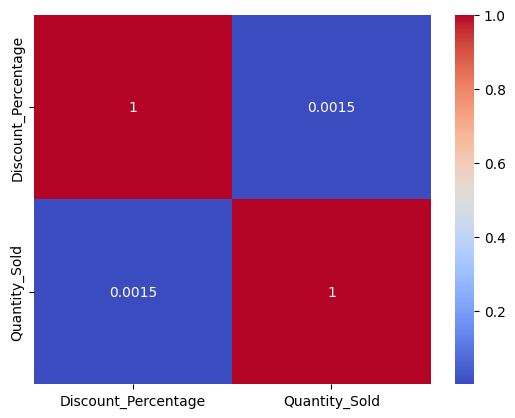

In [29]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Correlation between Discount_Percentage and Quantity_Sold = 0.003086

### This value is very close to 0.

### 📉 It means there is almost no linear relationship between the discount offered and the number of products sold.

### In simple words:

### "Giving more discount does not really increase quantity sold in a meaningful or predictable way."


# Best Discount Strategy:

Compare sales for high vs. low discount products.

In [30]:
# Fill missing discount values (if any)
data["Discount_Percentage"] = data["Discount_Percentage"].fillna(0)

# Create discount ranges
bins = [0, 10, 30, 100]
labels = ["Low Discount", "Medium Discount", "High Discount"]

data["Discount_Category"] = pd.cut(data["Discount_Percentage"], bins=bins, labels=labels)

data[["Discount_Percentage", "Discount_Category"]].head()


,Discount_Percentage,Discount_Category
0,26.260791,Medium Discount
1,26.882613,Medium Discount
2,30.274720,High Discount
3,0.000000,NaN
4,0.000000,NaN


In [31]:
discount_sales = data.groupby("Discount_Category")["Total_Sales"].sum().reset_index()

In [32]:
colors=['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']
fig = px.pie(discount_sales, names="Discount_Category", values="Total_Sales", 
             title="Total Sales by Discount Category",
             color="Total_Sales",
              width=500,   
             height=500,
             hole=0.5,
              color_discrete_sequence=colors
             
)
fig.update_traces(textinfo="label+percent") 
fig.show()

# Best Discount Strategy
**Implementing Medium-level discounts appears to be the sweet spot — driving maximum sales while potentially maintaining healthy profit margins.**
        
**📌 Recommendation: Focus on offering 10%–30% discounts, especially during seasonal sales or targeted campaigns.**



# Seasonal Trends in Sales:

### Check whether Winter, Summer, or All-Season products sell more.

In [33]:
Seasonal_Trends_in_Sales=data.groupby("Season") ["Total_Sales"].sum().reset_index()
Seasonal_Trends_in_Sales


,Season,Total_Sales
0,All-Season,1.659929e+09
1,Summer,1.667789e+09
2,Winter,1.677426e+09


In [34]:
fig=px.pie(Seasonal_Trends_in_Sales,
           names="Season",
           values="Total_Sales",
           color="Season",
           hole=0.5,
           width=500,
           height=500)
fig.update_traces(textinfo="label+percent")
fig.show()